In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2024-05-04 13:59:55.657081: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.13.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


/var/folders/k_/2tytwy6d2ll1_kvk_k0j7vd00000gn/T/ipykernel_17258/1853370235.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('adult/adult.data', sep=", ",header = None)
/var/folders/k_/2tytwy6d2ll1_kvk_k0j7vd00000gn/T/ipykernel_17258/1853370235.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [5]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


In [6]:
from keras.callbacks import ModelCheckpoint

In [7]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9771 (38.17 KB)
Trainable params: 9771 (38.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
save_best_model = ModelCheckpoint("wagi_best.h5py",save_best_only=True)
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [10]:
save_best_model = ModelCheckpoint("wagi_best.h5py",save_best_only=True)
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

# Reshape labels if necessary (for example, for categorical crossentropy)
y_train = np.expand_dims(y_train, axis=-1)
y_test = np.expand_dims(y_test, axis=-1)
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[save_best_model])

Epoch 1/100
928/943 [============================>.] - ETA: 0s - loss: 0.4383 - accuracy: 0.7905INFO:tensorflow:Assets written to: wagi_best.h5py/assets


INFO:tensorflow:Assets written to: wagi_best.h5py/assets


943/943 [==============================] - 4s 3ms/step - loss: 0.4375 - accuracy: 0.7909 - val_loss: 0.3830 - val_accuracy: 0.8063
Epoch 2/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3796 - accuracy: 0.8103 - val_loss: 0.3928 - val_accuracy: 0.7927
Epoch 3/100
937/943 [============================>.] - ETA: 0s - loss: 0.3749 - accuracy: 0.8104INFO:tensorflow:Assets written to: wagi_best.h5py/assets


INFO:tensorflow:Assets written to: wagi_best.h5py/assets


943/943 [==============================] - 2s 2ms/step - loss: 0.3746 - accuracy: 0.8106 - val_loss: 0.3789 - val_accuracy: 0.8165
Epoch 4/100
917/943 [============================>.] - ETA: 0s - loss: 0.3714 - accuracy: 0.8136INFO:tensorflow:Assets written to: wagi_best.h5py/assets


INFO:tensorflow:Assets written to: wagi_best.h5py/assets


943/943 [==============================] - 2s 2ms/step - loss: 0.3717 - accuracy: 0.8137 - val_loss: 0.3676 - val_accuracy: 0.8186
Epoch 5/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3676 - accuracy: 0.8181 - val_loss: 0.3753 - val_accuracy: 0.7952
Epoch 6/100
940/943 [============================>.] - ETA: 0s - loss: 0.3723 - accuracy: 0.8111INFO:tensorflow:Assets written to: wagi_best.h5py/assets


INFO:tensorflow:Assets written to: wagi_best.h5py/assets


943/943 [==============================] - 2s 3ms/step - loss: 0.3722 - accuracy: 0.8112 - val_loss: 0.3646 - val_accuracy: 0.8153
Epoch 7/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3689 - accuracy: 0.8143 - val_loss: 0.3731 - val_accuracy: 0.8158
Epoch 8/100
932/943 [============================>.] - ETA: 0s - loss: 0.3678 - accuracy: 0.8145INFO:tensorflow:Assets written to: wagi_best.h5py/assets


INFO:tensorflow:Assets written to: wagi_best.h5py/assets


943/943 [==============================] - 2s 2ms/step - loss: 0.3676 - accuracy: 0.8145 - val_loss: 0.3631 - val_accuracy: 0.8192
Epoch 9/100
943/943 [==============================] - ETA: 0s - loss: 0.3664 - accuracy: 0.8175INFO:tensorflow:Assets written to: wagi_best.h5py/assets


INFO:tensorflow:Assets written to: wagi_best.h5py/assets


943/943 [==============================] - 2s 2ms/step - loss: 0.3664 - accuracy: 0.8175 - val_loss: 0.3630 - val_accuracy: 0.8129
Epoch 10/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3658 - accuracy: 0.8168 - val_loss: 0.3683 - val_accuracy: 0.8122
Epoch 11/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3640 - accuracy: 0.8171 - val_loss: 0.3652 - val_accuracy: 0.8196
Epoch 12/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3637 - accuracy: 0.8177 - val_loss: 0.3686 - val_accuracy: 0.8120
Epoch 13/100
916/943 [============================>.] - ETA: 0s - loss: 0.3643 - accuracy: 0.8167INFO:tensorflow:Assets written to: wagi_best.h5py/assets


INFO:tensorflow:Assets written to: wagi_best.h5py/assets


943/943 [==============================] - 2s 2ms/step - loss: 0.3631 - accuracy: 0.8175 - val_loss: 0.3629 - val_accuracy: 0.8173
Epoch 14/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3644 - accuracy: 0.8163 - val_loss: 0.3654 - val_accuracy: 0.8122
Epoch 15/100
917/943 [============================>.] - ETA: 0s - loss: 0.3663 - accuracy: 0.8136INFO:tensorflow:Assets written to: wagi_best.h5py/assets


INFO:tensorflow:Assets written to: wagi_best.h5py/assets


943/943 [==============================] - 2s 2ms/step - loss: 0.3668 - accuracy: 0.8138 - val_loss: 0.3626 - val_accuracy: 0.8196
Epoch 16/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3642 - accuracy: 0.8165 - val_loss: 0.3658 - val_accuracy: 0.8155
Epoch 17/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3653 - accuracy: 0.8166 - val_loss: 0.3710 - val_accuracy: 0.8064
Epoch 18/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3634 - accuracy: 0.8151 - val_loss: 0.3724 - val_accuracy: 0.8094
Epoch 19/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3639 - accuracy: 0.8159 - val_loss: 0.3657 - val_accuracy: 0.8158
Epoch 20/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3646 - accuracy: 0.8168 - val_loss: 0.3640 - val_accuracy: 0.8181
Epoch 21/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3647 - accuracy: 0.8158 - val_loss: 0.3679 - val_accuracy: 0.8159
Epoch

INFO:tensorflow:Assets written to: wagi_best.h5py/assets


943/943 [==============================] - 2s 2ms/step - loss: 0.3625 - accuracy: 0.8157 - val_loss: 0.3625 - val_accuracy: 0.8169
Epoch 36/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3612 - accuracy: 0.8171 - val_loss: 0.3758 - val_accuracy: 0.8079
Epoch 37/100
914/943 [============================>.] - ETA: 0s - loss: 0.3602 - accuracy: 0.8167INFO:tensorflow:Assets written to: wagi_best.h5py/assets


INFO:tensorflow:Assets written to: wagi_best.h5py/assets


943/943 [==============================] - 2s 3ms/step - loss: 0.3604 - accuracy: 0.8163 - val_loss: 0.3622 - val_accuracy: 0.8169
Epoch 38/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3608 - accuracy: 0.8170 - val_loss: 0.3706 - val_accuracy: 0.8106
Epoch 39/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3606 - accuracy: 0.8173 - val_loss: 0.3680 - val_accuracy: 0.8138
Epoch 40/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3637 - accuracy: 0.8158 - val_loss: 0.3693 - val_accuracy: 0.8122
Epoch 41/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3615 - accuracy: 0.8172 - val_loss: 0.3630 - val_accuracy: 0.8181
Epoch 42/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3614 - accuracy: 0.8160 - val_loss: 0.3652 - val_accuracy: 0.8154
Epoch 43/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3609 - accuracy: 0.8169 - val_loss: 0.3687 - val_accuracy: 0.8155
Epoch

INFO:tensorflow:Assets written to: wagi_best.h5py/assets


943/943 [==============================] - 2s 3ms/step - loss: 0.3584 - accuracy: 0.8181 - val_loss: 0.3617 - val_accuracy: 0.8163
Epoch 64/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3578 - accuracy: 0.8183 - val_loss: 0.3648 - val_accuracy: 0.8156
Epoch 65/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3598 - accuracy: 0.8160 - val_loss: 0.3652 - val_accuracy: 0.8187
Epoch 66/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3579 - accuracy: 0.8169 - val_loss: 0.3629 - val_accuracy: 0.8153
Epoch 67/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3572 - accuracy: 0.8173 - val_loss: 0.3816 - val_accuracy: 0.8109
Epoch 68/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3578 - accuracy: 0.8196 - val_loss: 0.3716 - val_accuracy: 0.8088
Epoch 69/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3573 - accuracy: 0.8165 - val_loss: 0.3644 - val_accuracy: 0.8142
Epoch

INFO:tensorflow:Assets written to: wagi_best.h5py/assets


943/943 [==============================] - 3s 3ms/step - loss: 0.3560 - accuracy: 0.8206 - val_loss: 0.3611 - val_accuracy: 0.8175
Epoch 73/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3574 - accuracy: 0.8181 - val_loss: 0.3644 - val_accuracy: 0.8138
Epoch 74/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3563 - accuracy: 0.8198 - val_loss: 0.3631 - val_accuracy: 0.8175
Epoch 75/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3567 - accuracy: 0.8193 - val_loss: 0.3618 - val_accuracy: 0.8164
Epoch 76/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3565 - accuracy: 0.8189 - val_loss: 0.3655 - val_accuracy: 0.8143
Epoch 77/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3562 - accuracy: 0.8186 - val_loss: 0.3655 - val_accuracy: 0.8185
Epoch 78/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3562 - accuracy: 0.8207 - val_loss: 0.3651 - val_accuracy: 0.8159
Epoch

INFO:tensorflow:Assets written to: wagi_best.h5py/assets


943/943 [==============================] - 3s 3ms/step - loss: 0.3574 - accuracy: 0.8186 - val_loss: 0.3610 - val_accuracy: 0.8161
Epoch 82/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3552 - accuracy: 0.8205 - val_loss: 0.4121 - val_accuracy: 0.8185
Epoch 83/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3593 - accuracy: 0.8191 - val_loss: 0.3716 - val_accuracy: 0.8134
Epoch 84/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3637 - accuracy: 0.8180 - val_loss: 0.3639 - val_accuracy: 0.8165
Epoch 85/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3564 - accuracy: 0.8200 - val_loss: 0.3669 - val_accuracy: 0.8149
Epoch 86/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3558 - accuracy: 0.8202 - val_loss: 0.3630 - val_accuracy: 0.8158
Epoch 87/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3563 - accuracy: 0.8192 - val_loss: 0.3620 - val_accuracy: 0.8162
Epoch

INFO:tensorflow:Assets written to: wagi_best.h5py/assets


943/943 [==============================] - 2s 3ms/step - loss: 0.3552 - accuracy: 0.8197 - val_loss: 0.3609 - val_accuracy: 0.8160
Epoch 93/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3551 - accuracy: 0.8203 - val_loss: 0.3671 - val_accuracy: 0.8128
Epoch 94/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3563 - accuracy: 0.8200 - val_loss: 0.3634 - val_accuracy: 0.8138
Epoch 95/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3650 - accuracy: 0.8150 - val_loss: 0.3639 - val_accuracy: 0.8151
Epoch 96/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3548 - accuracy: 0.8213 - val_loss: 0.3633 - val_accuracy: 0.8177
Epoch 97/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3602 - accuracy: 0.8163 - val_loss: 0.3619 - val_accuracy: 0.8163
Epoch 98/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3556 - accuracy: 0.8201 - val_loss: 0.3638 - val_accuracy: 0.8161
Epoch

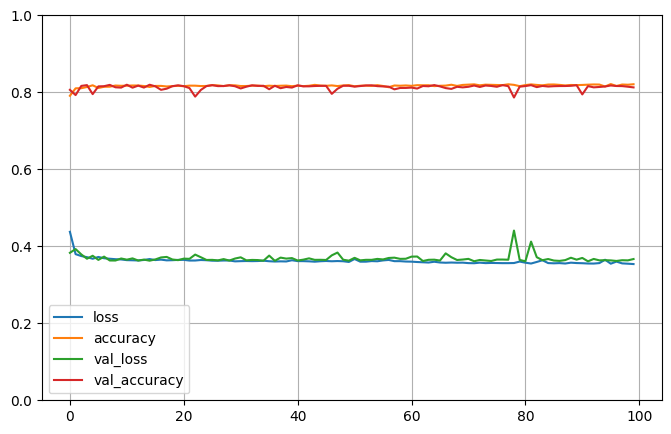

In [11]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 1s 1ms/step - loss: 0.3669 - accuracy: 0.8127


[0.3668786883354187, 0.8126826286315918]

In [15]:
from sklearn.metrics import accuracy_score

# Get predictions
y_pred = model.predict(X_test)

# Assuming a binary classification problem
y_pred = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

471/471 [==============================] - 1s 929us/step
Accuracy: 0.8160026560424967


# Zad

Wczytaj nauczony model

In [16]:
model.load_weights("wagi_best.h5py")
model.evaluate(X_test,y_test)

 44/471 [=>............................] - ETA: 0s - loss: 0.4021 - accuracy: 0.7827 

2024-05-04 14:06:46.318054: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open wagi_best.h5py: FAILED_PRECONDITION: wagi_best.h5py; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


471/471 [==============================] - 1s 1ms/step - loss: 0.3609 - accuracy: 0.8160


[0.36092934012413025, 0.8160026669502258]

# Zad

* Naucz dowolny model na zbiorze MNIST.
* Zapisz optymalne parametry uczenia do pliku
* Wczytaj dane z pliku